# Pricing Test - A/B Testing

# Motivation

As I am currently studying A/B Testing, I would like to have a better understanding on each step in conducting a A/B test. And obviously there's no better way than to get my hands dirty, and code it out by myself. 

Furthermore, I believe this notebook can be a A/B Testing sample code that I can repeatedly utilize and review whenever I conduct an A/B Test with Python in the future.

And also, I would like to review some frequently used functions/libraries in Python as a preparation for DS interviews.

Lastly, I recently heard of a couple of new facinating python libraries, this includes modeling & data viz, and I would like to try them out.

## Load & Check Data

In [1]:
# Import Packages
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
# Read Tables
df_user_table = pd.read_csv('user_table.csv', dtype={'user_id':str})
df_test_results = pd.read_csv('test_results.csv', dtype={'user_id':str})

Some of my routines steps in understanding a table will be:

1. Looking at some samples: .sample()

2. Checking the data size: Using len() or .shape

3. Checking for duplications: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

4. Look at some basic statistical summary of data: Using Describe()

5. Check data type: Applying type

In [5]:
df_user_table.sample(10)

,user_id,city,country,lat,long
233350,756508,Tacoma,USA,47.2500,-122.4600
23421,8330,Appleton,USA,44.2700,-88.4000
132145,745552,Rochester,USA,43.1700,-77.6200
255042,735562,Fort Worth,USA,32.7500,-97.3400
223496,256499,Virginia Beach,USA,36.7400,-76.0400
6895,417592,Rocky Mount,USA,35.9600,-77.8100
200156,967699,New York,USA,40.6700,-73.9400
510,919990,Moore,USA,35.3300,-97.4700
177617,274363,San Francisco,USA,37.7700,-122.4500
47155,653804,Oshkosh,USA,44.0200,-88.5500


In [6]:
df_user_table.shape

(275616, 5)

In [7]:
df_user_table.applymap(type).apply(pd.value_counts).fillna(0)

,user_id,city,country,lat,long
<class 'str'>,275616.0000,275616.0000,275616.0000,0.0000,0.0000
<class 'float'>,0.0000,0.0000,0.0000,275616.0000,275616.0000


In [8]:
df_user_table.describe(include='all')

,user_id,city,country,lat,long
count,275616,275616,275616,275616.0000,275616.0000
unique,275616,923,1,nan,nan
top,37348,New York,USA,nan,nan
freq,1,25748,275616,nan,nan
mean,NaN,NaN,NaN,37.1117,-93.9818
std,NaN,NaN,NaN,5.2096,18.0865
min,NaN,NaN,NaN,19.7000,-157.8000
25%,NaN,NaN,NaN,33.6600,-112.2000
50%,NaN,NaN,NaN,37.7400,-88.9300
75%,NaN,NaN,NaN,40.7000,-78.9100


In [9]:
# # If there's any duplications I would check it out with .duplicated()
# df_user_table[df_user_table.duplicated(subset=['user_id'], keep=False)]

In [10]:
df_test_results.sample(10)

,user_id,timestamp,source,device,operative_system,test,price,converted
1751,18434,2015-04-24 13:25:04,ads-yahoo,mobile,iOS,1,59,0
221222,947822,2015-03-24 22:18:15,ads-google,mobile,android,0,39,0
312885,707242,2015-05-26 16:59:48,ads_facebook,web,windows,0,39,0
84909,549857,2015-04-07 13:40:33,direct_traffic,web,windows,0,39,0
195369,868679,2015-04-18 01:38:05,direct_traffic,mobile,iOS,0,39,0
41477,586615,2015-05-08 04:49:23,ads_other,mobile,android,0,39,0
134124,557231,2015-05-20 10:02:14,ads_facebook,mobile,android,0,39,0
223820,82922,2015-05-16 12:33:27,ads-google,web,mac,1,59,0
198466,241528,2015-03-17 09:03:56,ads_facebook,web,windows,0,39,0
249964,858489,2015-03-04 09:24:57,seo-google,mobile,iOS,0,39,0


In [11]:
df_test_results.shape

(316800, 8)

In [12]:
# Convert 'timestamp' to datetime
df_test_results['timestamp'] = pd.to_datetime(df_test_results['timestamp'].str.replace(':60',':00'))

In [13]:
df_test_results.applymap(type).apply(pd.value_counts).fillna(0)

,user_id,timestamp,source,device,operative_system,test,price,converted
<class 'str'>,316800.0000,0.0000,316800.0000,316800.0000,316800.0000,0.0000,0.0000,0.0000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,0.0000,316800.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
<class 'int'>,0.0000,0.0000,0.0000,0.0000,0.0000,316800.0000,316800.0000,316800.0000


In [14]:
df_test_results.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,timestamp,source,device,operative_system,test,price,converted
count,316800,316800,316800,316800,316800,316800.0000,316800.0000,316800.0000
unique,316800,140931,12,2,6,nan,nan,nan
top,452193,2015-04-12 11:51:16,direct_traffic,mobile,windows,nan,nan,nan
freq,1,12,60357,186471,100976,nan,nan,nan
first,NaN,2015-03-02 00:04:12,NaN,NaN,NaN,nan,nan,nan
last,NaN,2015-05-31 23:59:45,NaN,NaN,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,0.3601,46.2051,0.0183
std,NaN,NaN,NaN,NaN,NaN,0.4800,9.6015,0.1342
min,NaN,NaN,NaN,NaN,NaN,0.0000,39.0000,0.0000
25%,NaN,NaN,NaN,NaN,NaN,0.0000,39.0000,0.0000


In [15]:
# # If there's any duplications I would check it out with .duplicated()
# df_test_results[df_test_results.duplicated(subset=['user_id'], keep=False)]

No duplication for both table, however, the user_id(row) count has a large difference, let's check it out with python set operations! 

https://www.geeksforgeeks.org/python-set-operations-union-intersection-difference-symmetric-difference/


In [16]:
setUser = set(df_user_table['user_id'])
setTest = set(df_test_results['user_id'])

# union
print("Union :", len(setUser | setTest))
  
# intersection
print("Intersection :", len(setUser & setTest))
  
# difference
print("Difference 1:", len(setUser - setTest))
print("Difference 2:", len(setTest - setUser))
  
# symmetric difference
print("Symmetric difference :", len(setUser ^ setTest))

Union : 316800
Intersection : 275616
Difference 1: 0
Difference 2: 41184
Symmetric difference : 41184


You can certainly draw the Venn Diagram if you want to:
https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305

In [17]:
#Import libraries
from matplotlib_venn import venn2
from matplotlib import pyplot as plt
%matplotlib inline

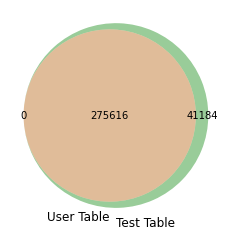

In [18]:
venn2(subsets = (len(setUser - setTest), len(setTest - setUser), len(setUser & setTest)), set_labels = ('User Table', 'Test Table'))

We can see that some of the user_id in the Test table are not in User table, this will lead to the common missing value problem. At this point, I choice to keep all the information.

In [19]:
df_results = pd.merge(df_test_results, df_user_table, how='left', on='user_id')

In [20]:
df_results.sample(10)

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
42044,833628,2015-05-03 13:56:38,seo-google,web,mac,0,39,0,New York,USA,40.6700,-73.9400
219652,483221,2015-04-03 10:27:59,direct_traffic,web,windows,0,39,0,El Paso,USA,31.8500,-106.4400
58001,285963,2015-04-04 01:37:01,direct_traffic,mobile,android,0,39,0,Baldwin Park,USA,34.0800,-117.9700
25457,48758,2015-05-19 15:23:15,ads_facebook,mobile,other,0,39,0,Chino Hills,USA,33.9700,-117.7500
316348,198136,2015-05-03 11:41:28,seo_facebook,mobile,iOS,0,39,0,Nampa,USA,43.5800,-116.5600
232409,446205,2015-05-29 15:25:08,ads-google,web,windows,1,59,0,Durham,USA,35.9800,-78.9100
215638,940359,2015-05-01 12:42:46,ads-yahoo,mobile,android,1,59,0,San Jose,USA,37.3000,-121.8500
241326,586060,2015-03-21 08:01:44,ads-bing,mobile,android,0,39,0,NaN,NaN,nan,nan
304680,267342,2015-05-15 04:36:22,ads-google,mobile,iOS,0,39,0,Kalamazoo,USA,42.2700,-85.5900
135501,258202,2015-04-04 10:50:53,ads-google,web,mac,0,39,0,New Orleans,USA,30.0700,-89.9300


We fininshed loading the data with some checkings.

Now we want to check if the control & experiment group has similar distributions.

In [21]:
df_test = df_results[df_results['test']==1]
df_control = df_results[df_results['test']==0]

In [22]:
df_test.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
count,114073,114073,114073,114073,114073,114073.0000,114073.0000,114073.0000,99188,99188,99188.0000,99188.0000
unique,114073,51078,12,2,6,nan,nan,nan,914,1,nan,nan
top,311472,2015-04-12 11:51:16,direct_traffic,mobile,windows,nan,nan,nan,New York,USA,nan,nan
freq,1,12,21598,65990,37385,nan,nan,nan,9176,99188,nan,nan
first,NaN,2015-03-02 00:04:12,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan
last,NaN,2015-05-31 23:53:22,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,1.0000,58.9728,0.0155,NaN,NaN,37.1384,-93.9772
std,NaN,NaN,NaN,NaN,NaN,0.0000,0.7367,0.1237,NaN,NaN,5.2329,18.0763
min,NaN,NaN,NaN,NaN,NaN,1.0000,39.0000,0.0000,NaN,NaN,19.7000,-157.8000
25%,NaN,NaN,NaN,NaN,NaN,1.0000,59.0000,0.0000,NaN,NaN,33.6600,-112.2000


In [23]:
df_control.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
count,202727,202727,202727,202727,202727,202727.0000,202727.0000,202727.0000,176428,176428,176428.0000,176428.0000
unique,202727,91050,12,2,6,nan,nan,nan,918,1,nan,nan
top,452193,2015-04-10 08:29:07,direct_traffic,mobile,windows,nan,nan,nan,New York,USA,nan,nan
freq,1,11,38759,120481,63591,nan,nan,nan,16572,176428,nan,nan
first,NaN,2015-03-02 00:12:40,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan
last,NaN,2015-05-31 23:59:45,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,0.0000,39.0207,0.0199,NaN,NaN,37.0967,-93.9843
std,NaN,NaN,NaN,NaN,NaN,0.0000,0.6434,0.1397,NaN,NaN,5.1964,18.0923
min,NaN,NaN,NaN,NaN,NaN,0.0000,39.0000,0.0000,NaN,NaN,19.7000,-157.8000
25%,NaN,NaN,NaN,NaN,NaN,0.0000,39.0000,0.0000,NaN,NaN,33.6600,-112.2000


We found a strange thing, some users in test group have the price of \$39, while some other users in control group see \$59

In [24]:
df_test.groupby('price').size()

price
39       155
59    113918
dtype: int64

In [25]:
df_control.groupby('price').size()

price
39    202517
59       210
dtype: int64

I will drop those users before moving forward.

In [26]:
df_test = df_test[df_test['price']==59]
df_control = df_control[df_control['price']==39]

## Check A/B Test Randomization

To check the difference of each variable's distribution between control/test group, we can simply do a t-test on each variables &/ visualize them, but if there are too many varaibles, we could consider using decision trees or random forest to facilitate the exploration process.

Here, I want go through each steps of conducting a t-Test with variable 'lat'(latitude) (after dropping missing values), there shouldn't be a siginicant difference between test/control.

Ref: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


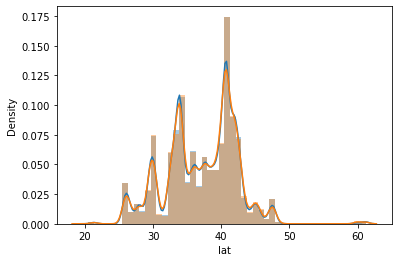

In [27]:
# Before conducting the t-Test, let's draw the distribution plot.
import seaborn as sns

lat_A = df_control['lat'].dropna()
lat_B = df_test['lat'].dropna()

sns.distplot(lat_A)
sns.distplot(lat_B)

Looks pretty much alike for me. Now let's start our t-Test.

Step 1. Determine a null and alternate hypothesis.

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present. In this example we can say that:

* H0 (Null Hypothesis): Latitude in test/control are the same

* HA (Alternative Hypothesis): Latitude in test/control are different (2 sided test)



Step 2. Determine the Alpha (/confidence interval) and degrees of freedom

The typical value of α is 0.05. This means that there is 95% confidence that the conclusion of this test will be valid. The degree of freedom is min(N_control-1, N_test-1)


Step 3. Calculate the Confidence Interval &/ t-Statistic for Diffence in Means

In [28]:
from scipy import stats
import numpy as np

In [29]:
# Calculate Point Estimate for Xb - Xa
Diff_lat_BA = lat_B.mean() - lat_A.mean()

In [30]:
Diff_lat_BA

0.04111044547091325

In [31]:
# Calculate the Standard Error for Xb - Xa
SE_lat_BA = np.sqrt(lat_B.var()/len(lat_B) + lat_A.var()/len(lat_A))

In [32]:
SE_lat_BA

0.0207294695643464

In [33]:
# Calculate the 95% Confidence Interval
min_95_CI_lat = Diff_lat_BA - 1.96 * SE_lat_BA
max_95_CI_lat = Diff_lat_BA + 1.96 * SE_lat_BA

In [34]:
min_95_CI_lat, max_95_CI_lat

(0.00048068512479430836, 0.08174020581703219)

In [35]:
# Calculate Test Statistics
T_Score_lat = (Diff_lat_BA - 0) / SE_lat_BA

In [36]:
T_Score_lat

1.983188491307132

We compare the result calculated above with the result using 'stats' library

In [37]:
Test_lat = stats.ttest_ind(lat_B, 
                       lat_A, 
                       equal_var=False
                       )

In [38]:
Test_lat.statistic

1.983188491078611

In [39]:
Test_lat.pvalue

0.04734771745131528

Step 4. Make Conclusion

Okay, so the T-score we calculated is correct, just the same as calculated by the 'stats' library.

And we can base our conclusion on:

1. T-score vs. 95% cutoff: |1.983| > 1.96

2. p-val vs. 5%: 0.047 < 0.05

3. 95% CI: (0.0005, 0.0817)

Conclusion: Reject H0 => There is a siginificant difference in Latitude between test/control group. Damn. I mean but is close ... 

Citing what the DS Take-Home Challenge Author said: "In practice, it is pretty frequent that test and control distributions are different, invalidating the test results. The number one reason for that is bugs or bias in the randomization algorithm that assigns users to test and control, leading to over/under representation of certain segments. That is, we might have more US users in control, but those users have higher conversion rate, so the difference we see in the metric is not only affected by the feature change that we are testing. "

I did a t-Test on Longitude also and found no siginificant difference. But to do the test for each variable is time consuming, I would like to move on to using tree methods.

But wait a second, for categorical data, why not practice the Chi-Square Test to see if there's siginificant difference? Let's do it with variable 'OS'

And also, we need to check on the time factor, does our data equally spread in across the time period?

In [40]:
df_control.groupby('operative_system').size()/len(df_control)

operative_system
android   0.2379
iOS       0.3051
linux     0.0109
mac       0.0807
other     0.0518
windows   0.3136
dtype: float64

In [41]:
df_test.groupby('operative_system').size()/len(df_test)

operative_system
android   0.2343
iOS       0.2946
linux     0.0169
mac       0.0765
other     0.0500
windows   0.3277
dtype: float64

In [42]:
df_OS = pd.concat([df_control[['operative_system','test']], df_test[['operative_system','test']]])

Plotting percentage in seaborn bar plot: https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot

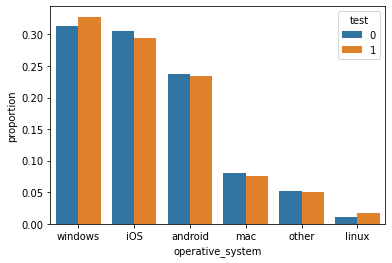

In [43]:
(df_OS['operative_system']
 .groupby(df_OS['test'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x='operative_system', y='proportion', hue='test'))

We could already see the slight difference between test & control.

In [44]:
# Calculate Expected for control group
SER_Exp_A = df_OS.groupby('operative_system').size()/len(df_OS)*len(df_control)

In [45]:
SER_Exp_A

operative_system
android   47916.4688
iOS       61025.4981
linux      2643.1817
mac       16035.0891
other     10353.2084
windows   64543.5538
dtype: float64

In [46]:
SER_A = df_control.groupby('operative_system').size()

In [47]:
SER_A

operative_system
android    48177
iOS        61793
linux       2204
mac        16345
other      10481
windows    63517
dtype: int64

In [48]:
# Calculate Expected for test group
SER_Exp_B = df_OS.groupby('operative_system').size()/len(df_OS)*len(df_test)

In [49]:
SER_Exp_B

operative_system
android   26953.5312
iOS       34327.5019
linux      1486.8183
mac        9019.9109
other      5823.7916
windows   36306.4462
dtype: float64

In [50]:
SER_B = df_test.groupby('operative_system').size()

In [51]:
SER_B

operative_system
android    26693
iOS        33560
linux       1926
mac         8710
other       5696
windows    37333
dtype: int64

In [52]:
(SER_A - SER_Exp_A)**2/SER_Exp_A

operative_system
android    1.4166
iOS        9.6527
linux     72.9729
mac        5.9897
other      1.5774
windows   16.3272
dtype: float64

In [53]:
(SER_B - SER_Exp_B)**2/SER_Exp_B

operative_system
android     2.5183
iOS        17.1600
linux     129.7271
mac        10.6481
other       2.8041
windows    29.0255
dtype: float64

In [54]:
# Calculate Chi-Square Test Statistics
((SER_A - SER_Exp_A)**2/SER_Exp_A).sum() + ((SER_B - SER_Exp_B)**2/SER_Exp_B).sum()

299.8193327610343

Degree of Freedom is: (N_OS-1)\*(N_Groups-1) = (6-1)*(2-1) = 5 

Compare with results from 'stats' library & find P-Value:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [55]:
from scipy.stats import chi2_contingency

chi2_contingency([SER_A, SER_B])

(299.8193327610343,
 1.0952307566597536e-62,
 5,
 array([[47916.46875346, 61025.49813074,  2643.18172768, 16035.08914943,
         10353.20842827, 64543.55381042],
        [26953.53124654, 34327.50186926,  1486.81827232,  9019.91085057,
          5823.79157173, 36306.44618958]]))

In [56]:
# Calculate for variable 'source'
chi2_contingency([df_control.groupby('source').size(), df_test.groupby('source').size()])

(31.28629188016634,
 0.0009919073629335513,
 11,
 array([[14611.73898905, 37978.61745382,  4845.40650371, 34146.96394204,
         19088.50804115, 38573.81333923, 13233.82851454,  1372.15051432,
         14814.61758655,  5916.11910187,  4378.20973344, 13557.02628028],
        [ 8219.26101095, 21363.38254618,  2725.59349629, 19208.03605796,
         10737.49195885, 21698.18666077,  7444.17148546,   771.84948568,
          8333.38241345,  3327.88089813,  2462.79026656,  7625.97371972]]))

In [57]:
# Calculate for variable 'device'
chi2_contingency([df_control.groupby('device').size(), df_test.groupby('device').size()])

(76.01682303027343,
 2.8125833608921354e-18,
 1,
 array([[119210.0559009,  83306.9440991],
        [ 67056.9440991,  46861.0559009]]))

We could see significant difference between test/control in all the variables, especially, 'OS' & 'device'. Now let's check the time variable.

(Noting that the statistic results is quite different from using sklearn.feature_selection.chi2)

In [58]:
count_control_by_date = df_control.groupby(df_control['timestamp'].dt.date).size().to_frame(name='Count').reset_index()
count_test_by_date = df_test.groupby(df_test['timestamp'].dt.date).size().to_frame(name='Count').reset_index()

In [59]:
count_control_by_date.head(14)

,timestamp,Count
0,2015-03-02,1011
1,2015-03-03,918
2,2015-03-04,952
3,2015-03-05,1766
4,2015-03-06,4602
5,2015-03-07,3583
6,2015-03-08,2806
7,2015-03-09,945
8,2015-03-10,988
9,2015-03-11,926


In [60]:
df_control.groupby(df_control['timestamp'].dt.weekday).size().to_frame(name='Count').reset_index()

,timestamp,Count
0,0,12202
1,1,12706
2,2,11968
3,3,23827
4,4,58993
5,5,47541
6,6,35280


In [61]:
df_test.groupby(df_test['timestamp'].dt.weekday).size().to_frame(name='Count').reset_index()

,timestamp,Count
0,0,7006
1,1,6901
2,2,6854
3,3,13237
4,4,33057
5,5,26615
6,6,20248


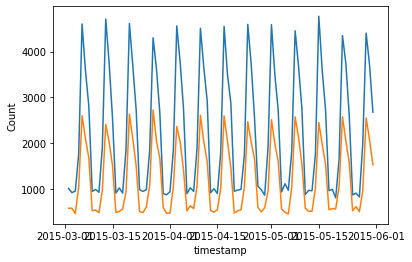

In [62]:
sns.lineplot(data=count_control_by_date, x='timestamp', y="Count")
sns.lineplot(data=count_test_by_date, x='timestamp', y="Count")

We could easily find that our data has a strong weekly pattern. There are more data from Fri, Sat, Sun. This is both true for control/test.

Let's move on to Tree-Model.

### Build Decision Tree.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [63]:
df_results = df_results[((df_results['test']==1) & (df_results['price']==59)) | ((df_results['test']==0) & (df_results['price']==39))]

In [64]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [65]:
# Make dummy vars. 
df_results_dummy = pd.get_dummies(df_results, columns=['source','device','operative_system','city','country'])
# Model features, test is the label and conversion is not needed 
train_cols = df_results_dummy.drop(['timestamp','user_id','test','price','converted'], axis=1).fillna(0)
  
tree=DecisionTreeClassifier(
    #change weights. Our df_results set is now perfectly balanced. It makes easier to understand the tree output
    class_weight="balanced",
    #only split if it's worthwhile. The default value of 0 means always split no matter what if you can increase overall performance, which creates tons of noisy and irrelevant splits
    min_impurity_decrease = 0.0001,
    max_depth = 3
    )
tree.fit(train_cols,df_results['test'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualize Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://ywtail.github.io/python/可视化/2_sklearn决策树可视化.html

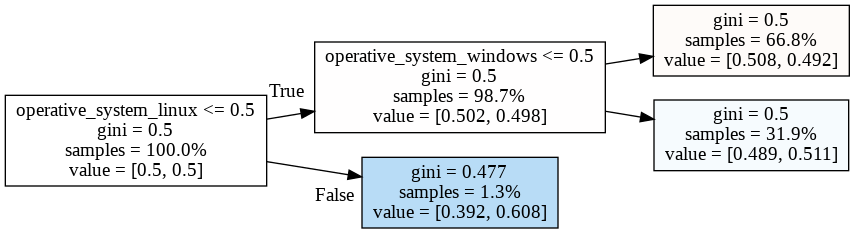

In [66]:
from IPython.display import Image  
import pydotplus

# Visualize the Tree on notebook
dot_data = export_graphviz(tree, feature_names=train_cols.columns, proportion=True, rotate=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# # Save & Open as dot file
# export_graphviz(tree, out_file="tree_test.dot", feature_names=train_cols.columns, proportion=True, rotate=True)
# with open("tree_test.dot") as f:
#     dot_graph = f.read()
  
# s = Source.from_file("tree_test.dot")
# s.view()

As we found out before, OS Linux & Windows were not randomly distributed in test/sample group. For Linux users, there were much higher chances to be in experiment group.

In [67]:
# We could check the result above by calculating the gini by ourself, we show the Gini calculation of Linux users here (noting that we set class_weight="balanced" for the tree)
count_all_control = len(df_control)
count_all_test = len(df_test)
count_linux_control = len(df_results[(df_results['operative_system']=='linux') & (df_results['test']==0)])
count_linux_test = len(df_results[(df_results['operative_system']=='linux') & (df_results['test']==1)])

ratio_linux_control = count_linux_control/count_all_control
ratio_linux_test = count_linux_test/count_all_test

ratio_linux_control, ratio_linux_test = ratio_linux_control/(ratio_linux_control+ratio_linux_test), ratio_linux_test/(ratio_linux_control+ratio_linux_test)

Gino_linux = 1 - (ratio_linux_control**2 + ratio_linux_test**2)
ratio_linux_control, ratio_linux_test, Gino_linux

(0.39161793683481777, 0.6083820631651822, 0.4765066567681169)

We could probably try Random Forest to see feature importance here?

## Q1: Should the company sell its software for \$39 or \$59?

First, I will do a t-Test on the revenue of test/control group. And then I will check if the result is consistence across different os.

In [68]:
Revenue_A = df_control['converted'] * 39
Revenue_B = df_test['converted'] * 59

In [69]:
df_control['converted'].mean(), Revenue_A.mean()

(0.019899563987220825, 0.7760829955016122)

In [70]:
df_test['converted'].mean(), Revenue_B.mean()

(0.01555504836812444, 0.917747853719342)

In [71]:
Test_Revenue = stats.ttest_ind(Revenue_B, 
                                Revenue_A, 
                                equal_var=False,
                                )

In [72]:
# 2-sided test, pvalue need to divide by 2
Test_Revenue.statistic, Test_Revenue.pvalue/2

(5.715224666463108, 5.486288656210391e-09)

The Revenue in the testing group is significantly higher than control group, even though it's conversion is lower. 

In [73]:
df_results['Revenue'] = df_results.apply(lambda x: x.converted*59 if x.test==1 else x.converted*39, axis=1)

In [74]:
Revenue_OS = df_results.groupby('operative_system')['Revenue'].agg([
                                ('Count', 'count'),
                                ("p_value", lambda x: stats.ttest_ind(x[df_results["test"]==1], 
                                                                    x[df_results["test"]==0], 
                                                                    equal_var=False
                                                                    ).pvalue/2),
                                ("Revenue_test", lambda x: x[df_results["test"]==1].mean()),
                                ("Revenue_control", lambda x: x[df_results["test"]==0].mean())
                                ]).reindex(['Count','p_value','Revenue_test','Revenue_control'], 
                                                axis=1
                                                )

In [75]:
Revenue_OS

,Count,p_value,Revenue_test,Revenue_control
operative_system,,,,
android,74870,0.0220,0.7294,0.6371
iOS,95353,0.0000,1.1796,0.9202
linux,4130,0.0000,0.0000,0.6016
mac,25055,0.0057,1.2532,0.9926
other,16177,0.1288,0.6526,0.5470
windows,100850,0.0097,0.8265,0.7294


## Conclusion 1.

The result actually differ with the user's OS: For andriod, iOS, mac, windows users, the test is siginificantly better; while for linux users the test is significantly worse.

Back to the question, the best solution is certainly run the A/B Test again with a better randomization (remember that we have significant more windows & linux users in test group); If that is not an option, I choice to beleve \$59 is better. You could see that overall we have better revenue with price \$59, and this is a result with more windows & linux users who are actually performing worse than average in the test group.

## Question 2: What are your main findings looking at the data?

Now, I will again use tree model, this time for learning which segment of users perform especially better or worse than others. I will build a tree for both test & control group.

### Build a Tree for Control Group

In [76]:
# Make dummy vars. 
df_control['month'] = df_control['timestamp'].dt.month
df_control['weekday'] = df_control['timestamp'].dt.weekday
df_control_dummy = pd.get_dummies(df_control, columns=['source','device','operative_system','month','weekday'])
# Model features (I decide to not using city here since there are way too many cities, and we only have one country... so we won't be using it) 
train_cols_control = df_control_dummy.drop(['timestamp','user_id','test','price','converted','city','country'], axis=1).fillna(0)
  
tree_control = DecisionTreeClassifier(
    max_depth = 4
    )
tree_control.fit(train_cols_control,df_control['converted'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

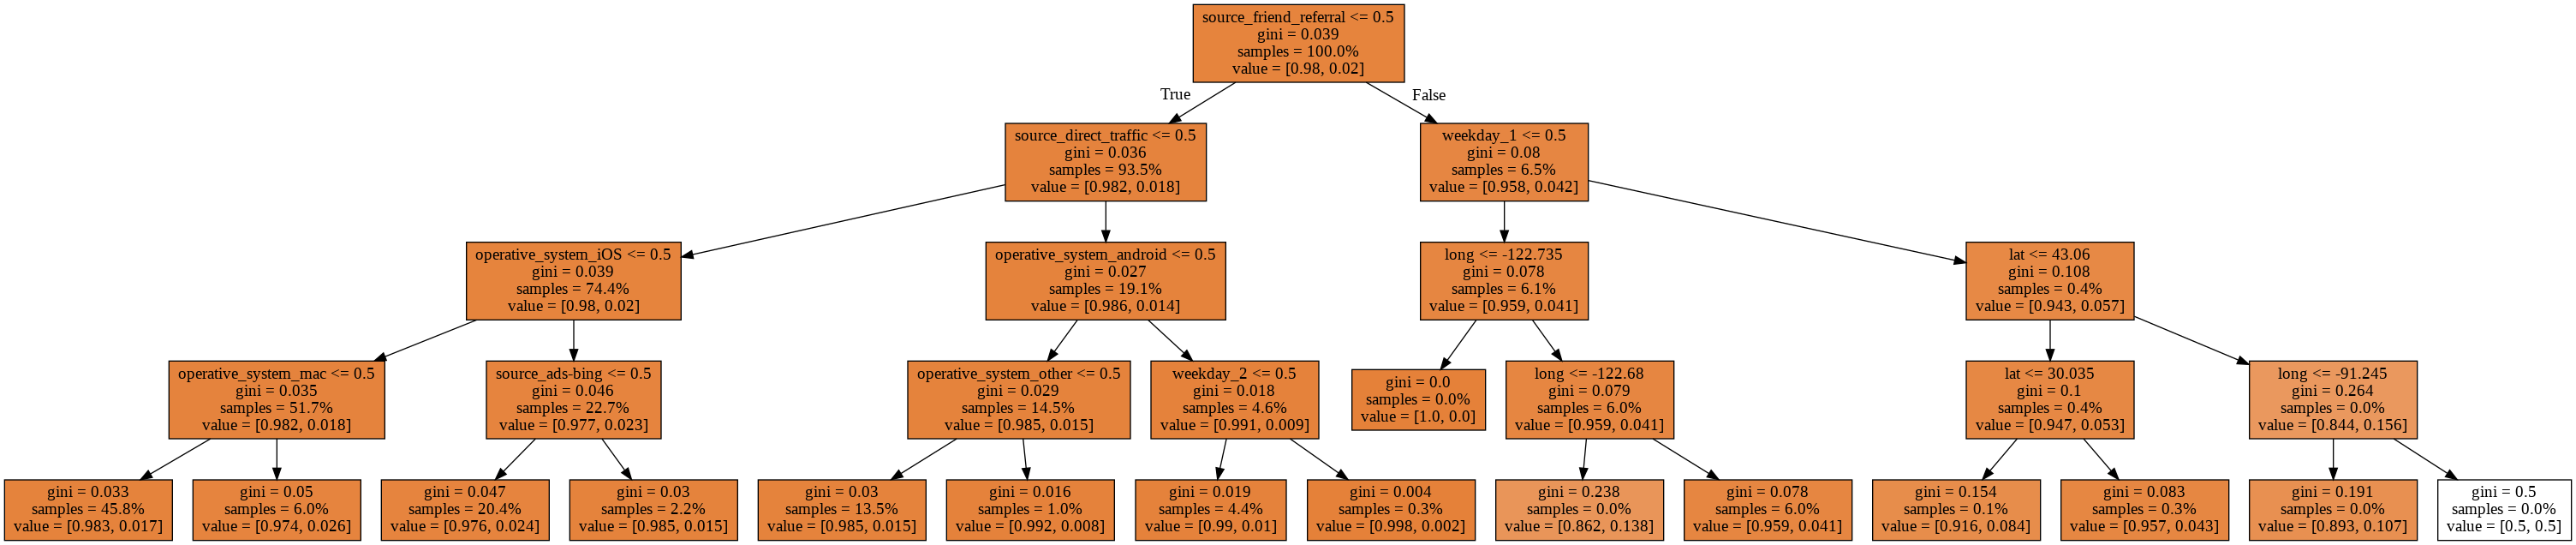

In [77]:
# Visualize the Tree on notebook
dot_data = export_graphviz(tree_control, feature_names=train_cols_control.columns, proportion=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [78]:
pd.Series(tree_control.feature_importances_,index = train_cols_control.columns).sort_values(ascending=False).head(15)

source_friend_referral     0.5575
source_direct_traffic      0.0970
long                       0.0805
operative_system_iOS       0.0789
operative_system_mac       0.0655
lat                        0.0461
source_ads-bing            0.0273
operative_system_android   0.0187
weekday_1                  0.0168
operative_system_other     0.0089
weekday_2                  0.0027
source_seo-google          0.0000
source_seo-bing            0.0000
source_ads_other           0.0000
source_seo-yahoo           0.0000
dtype: float64

### Build a Tree for Testing Group

In [79]:
# Make dummy vars. 
df_test['month'] = df_test['timestamp'].dt.month
df_test['weekday'] = df_test['timestamp'].dt.weekday
df_test_dummy = pd.get_dummies(df_test, columns=['source','device','operative_system','month','weekday'])
# Model features
train_cols_test = df_test_dummy.drop(['timestamp','user_id','test','price','converted','city','country'], axis=1).fillna(0)
  
tree_test = DecisionTreeClassifier(
    max_depth = 4
    )
tree_test.fit(train_cols_test,df_test['converted'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

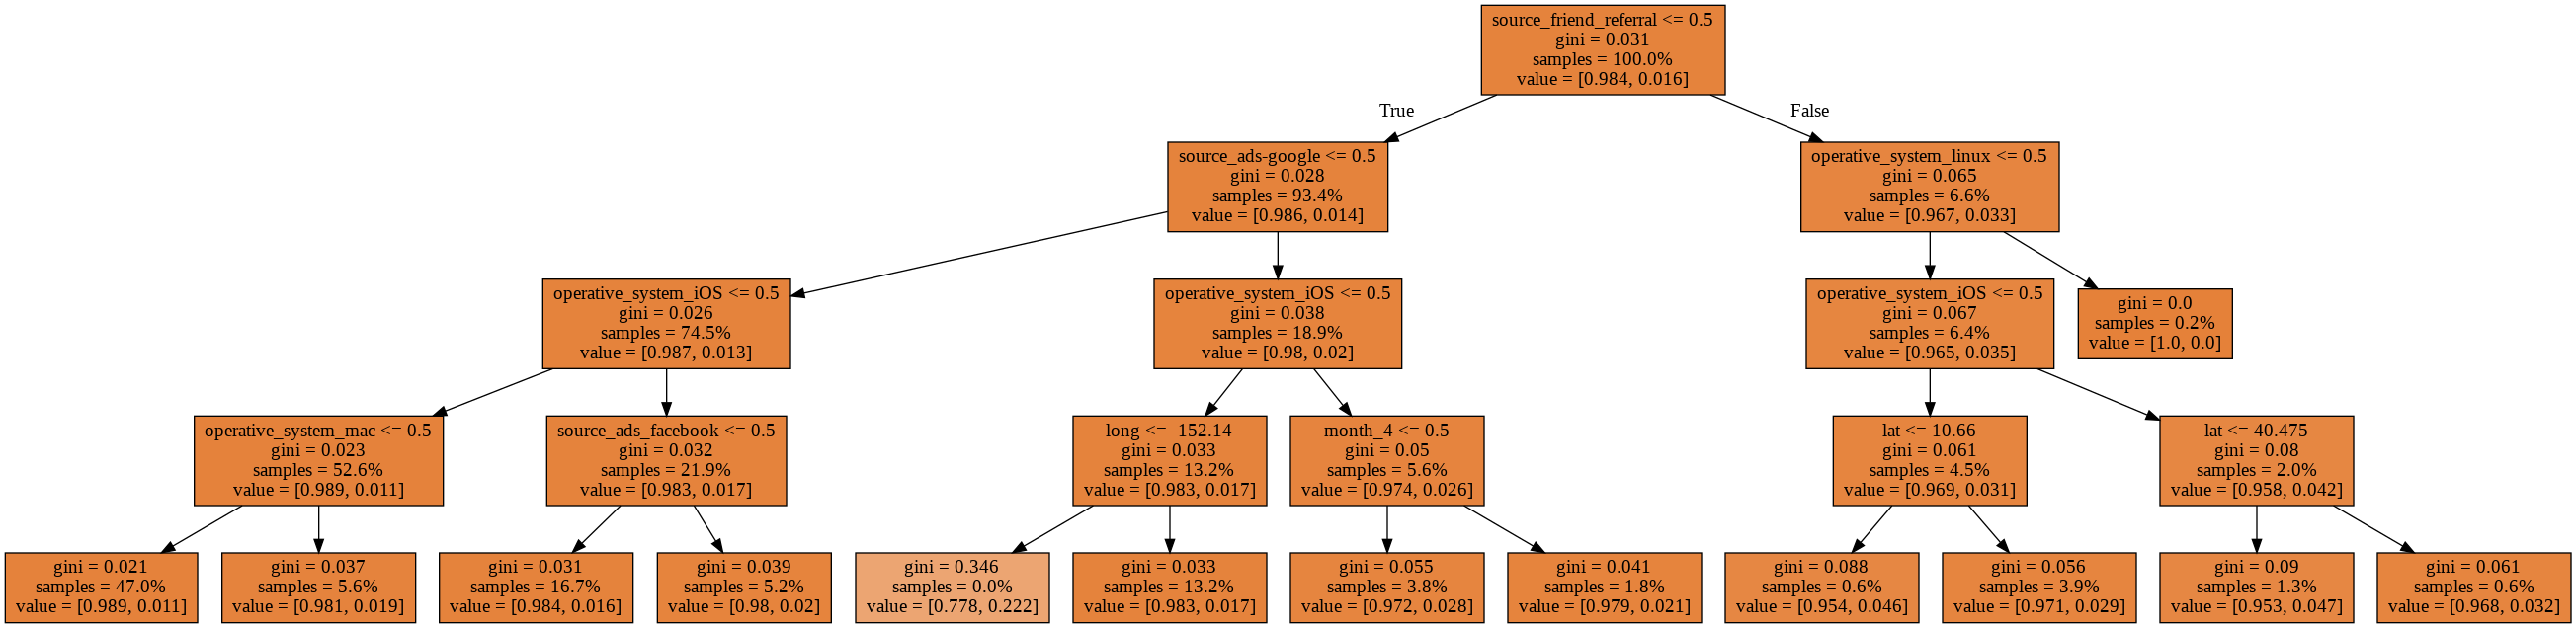

In [80]:
# Visualize the Tree on notebook
dot_data = export_graphviz(tree_test, feature_names=train_cols_test.columns, proportion=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())


In [81]:
pd.Series(tree_test.feature_importances_,index = train_cols_test.columns).sort_values(ascending=False).head(15)

source_friend_referral   0.4454
operative_system_iOS     0.1689
source_ads-google        0.1320
operative_system_mac     0.0675
long                     0.0650
lat                      0.0486
operative_system_linux   0.0457
source_ads_facebook      0.0134
month_4                  0.0134
source_seo-other         0.0000
source_seo-google        0.0000
source_direct_traffic    0.0000
source_seo-bing          0.0000
source_seo_facebook      0.0000
source_ads_other         0.0000
dtype: float64

Source, OS, and also longtitude, latitude plays crucial role here, let's check it out.

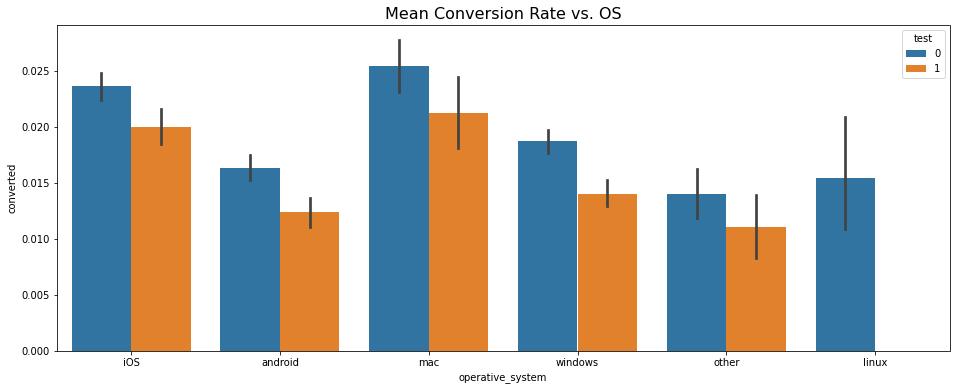

In [82]:
# Visualization of operative_system
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='operative_system', y='converted', hue='test', data=df_results, ax=ax)
ax.set_title('Mean Conversion Rate vs. OS', fontsize=16)
plt.show()

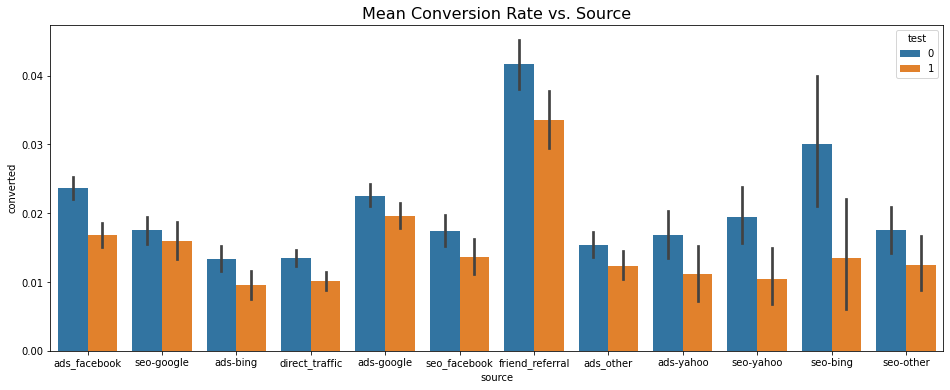

In [83]:
# Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='source', y='converted', hue='test', data=df_results, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

In [84]:
long_percentile = df_results['long'].describe(percentiles=[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])[3:12]
lat_percentile = df_results['lat'].describe(percentiles=[0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875])[3:12]

In [85]:
cut_bins = long_percentile
cut_labels = ['<12.5','12.5-25','25-37.5','37.5-50','50-62.5','62.5-75','75-87.5','>87.5']
df_results['long_cut'] = pd.cut(df_results['long'], bins=cut_bins, labels=cut_labels, right=False)

cut_bins = lat_percentile
cut_labels = ['<12.5','12.5-25','25-37.5','37.5-50','50-62.5','62.5-75','75-87.5','>87.5']
df_results['lat_cut'] = pd.cut(df_results['lat'], bins=cut_bins, labels=cut_labels, right=False)

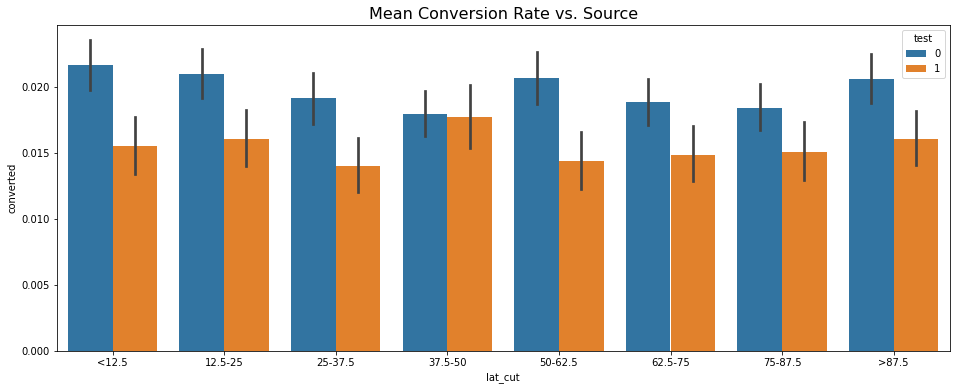

In [86]:
# Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='lat_cut', y='converted', hue='test', data=df_results, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

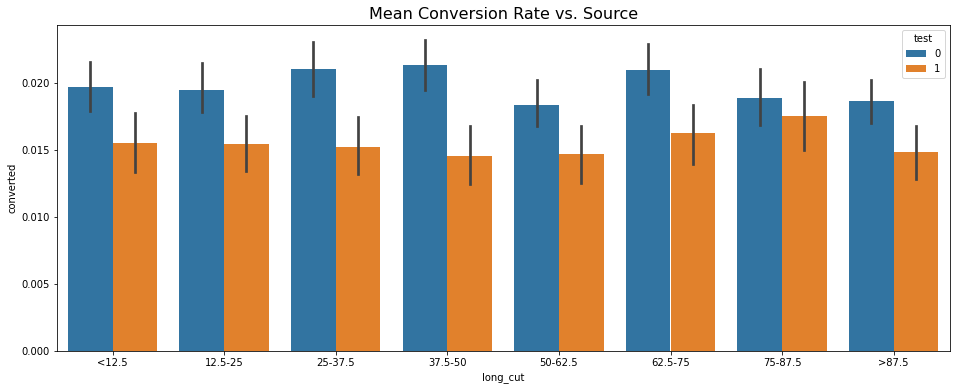

In [87]:
# Visualization of source
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='long_cut', y='converted', hue='test', data=df_results, ax=ax)
ax.set_title('Mean Conversion Rate vs. Source', fontsize=16)
plt.show()

## Conclusion 2.

Either in Control/Test, friend_referral contribute enormously to conversion =>
* Promote friend referal, give coupons to both users who refer and are refered.

Mac & iOS users have a very high conversion rate =>
* Launch more campaigns targeting these Apple users.

Linux users' conversion rate is extremely low and for testing group, not even one user converted =>
* There could very possibly be some bugs or unfriendly design for linux users.

Didn't really see as large different from location information. 




## Question 3: After how many days you would have stopped the test? Please, explain why.

In [95]:
df_results[df_results['test']==0]['Revenue'].describe()

count   202517.0000
mean         0.7761
std          5.4466
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max         39.0000
Name: Revenue, dtype: float64

In [98]:
df_results[df_results['test']==1]['Revenue'].describe()

count   113918.0000
mean         0.9177
std          7.3010
min          0.0000
25%          0.0000
50%          0.0000
75%          0.0000
max         59.0000
Name: Revenue, dtype: float64

So back to Question 1, the motivation for running the test is to learn whether increasing the price of the software can improve revenue. 

* H0: Rev_B - Rev_A = 0
* HA: Rev_B - Rev_A > 0

Assume effect size = 10% =>
* HA: Rev_B - Rev_A = 0.1*Rev_A

Set Power = 80%, ⍺ (Significance Level) = 10% (c: critical value)

=> Under H0: (c-0)/SE = 1.28

=> Under HA: (0.1*Rev_A - c)/SE = 0.84 



In [121]:
from sympy import *

Rev_A = df_results[df_results['test']==0]['Revenue'].mean()

c = Symbol('c')
SE = Symbol('SE')
solve([c - 1.28*SE, 0.10*Rev_A - c - 0.84*SE],[c,SE])

{SE: 0.0366076884670572, c: 0.0468578412378332}

Okay, so we have the SE now. 

We assume σb = 7.30, σa = 5.45, Na = 1.78*Nb:

5.45^2/(1.78*Nb) + 7.30^2/Nb = (0.0366)^2
=> Nb = 52239

Approximately, we need to have a sample size 52,239 for our test group. 

Let's find out when did we collect that amount of samples.

In [104]:
df_test

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,weekday
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.0700,-78.9000,5,3
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1,East Orange,USA,40.7700,-74.2100,3,6
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0,Dayton,USA,39.7800,-84.2000,3,5
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0,Richmond,USA,37.5300,-77.4700,4,4
15,552048,2015-03-22 08:58:32,ads-bing,web,windows,1,59,0,Culver City,USA,34.0100,-118.4000,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316777,190563,2015-05-17 12:03:19,seo_facebook,mobile,android,1,59,0,New Haven,USA,41.3100,-72.9200,5,6
316778,796427,2015-04-02 09:33:18,seo-google,web,windows,1,59,0,Norwalk,USA,33.9100,-118.0800,4,3
316782,964001,2015-05-05 13:31:19,ads_other,web,windows,1,59,0,Athens-Clarke,USA,33.9500,-83.3900,5,1
316794,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59,0,Joliet,USA,41.5300,-88.1200,5,2


In [106]:
df_test['count'] = df_test['timestamp'].rank(method='first')

In [110]:
df_test[df_test['count']==52239]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,weekday,count
127730,592313,2015-04-12 14:24:44,direct_traffic,mobile,iOS,1,59,1,Yonkers,USA,40.9500,-73.8700,4,6,52239.0000


We find out that we have already collected 52,239 experiment samples on 4/12, and could just stop there.

In [115]:
end_time = df_test[df_test['count']==52239]['timestamp'].iloc[0]
df_control[df_control['timestamp']<=end_time]

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,month,weekday
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.3800,-81.7300,4,5
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0,NaN,NaN,nan,nan,3,2
13,460593,2015-03-21 09:43:51,friend_referral,mobile,iOS,0,39,1,Hampton,USA,37.0500,-76.2900,3,5
16,444108,2015-03-16 12:20:49,seo-google,web,mac,0,39,0,Milwaukee,USA,43.0600,-87.9700,3,0
17,692331,2015-03-08 13:19:55,ads-google,mobile,iOS,0,39,0,Deerfield Beach,USA,26.3100,-80.1200,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316790,108465,2015-03-29 20:25:55,ads-bing,web,windows,0,39,0,Omaha,USA,41.2600,-96.0100,3,6
316792,874512,2015-03-14 12:13:52,ads_facebook,web,windows,0,39,0,NaN,NaN,nan,nan,3,5
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0,NaN,NaN,nan,nan,4,5
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0,Bell Gardens,USA,33.9700,-118.1500,3,0


Just to make sure that the size of control group is about 1.78 times the test group so that our calculation is correct.

In [117]:
start_time = df_test[df_test['count']==1]['timestamp'].iloc[0]
end_time - start_time

Timedelta('41 days 14:20:32')

# Conclustion 3.
We could stop the experiment after about 41 days, on 4/12. On the settings of Power = 80% (prob of rejecting H0 when HA true), ⍺ = 0.05 (significance level), Effect Size = 10%.

### Plotting the Map with geopandas for fun

https://geopandas.org/gallery/create_geopandas_from_pandas.html

https://github.com/bendoesdata/make-a-map-geopandas/blob/master/Let's%20make%20a%20map!%20Geopandas%20and%20Matplotlib.ipynb

In [89]:
# load libraries
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [90]:
df_Map = df_results['converted'].groupby(df_results['city']).agg([('Conversion','mean'),('Count','count')]).sort_values(by='Conversion').reset_index()
df_Map = pd.merge(df_Map, df_user_table[['city','lat','long']].drop_duplicates(subset=['city']), how='left', on='city')

In [91]:
gdf = gpd.GeoDataFrame(df_Map, geometry=gpd.points_from_xy(df_Map.long, df_Map.lat)).set_index('city')

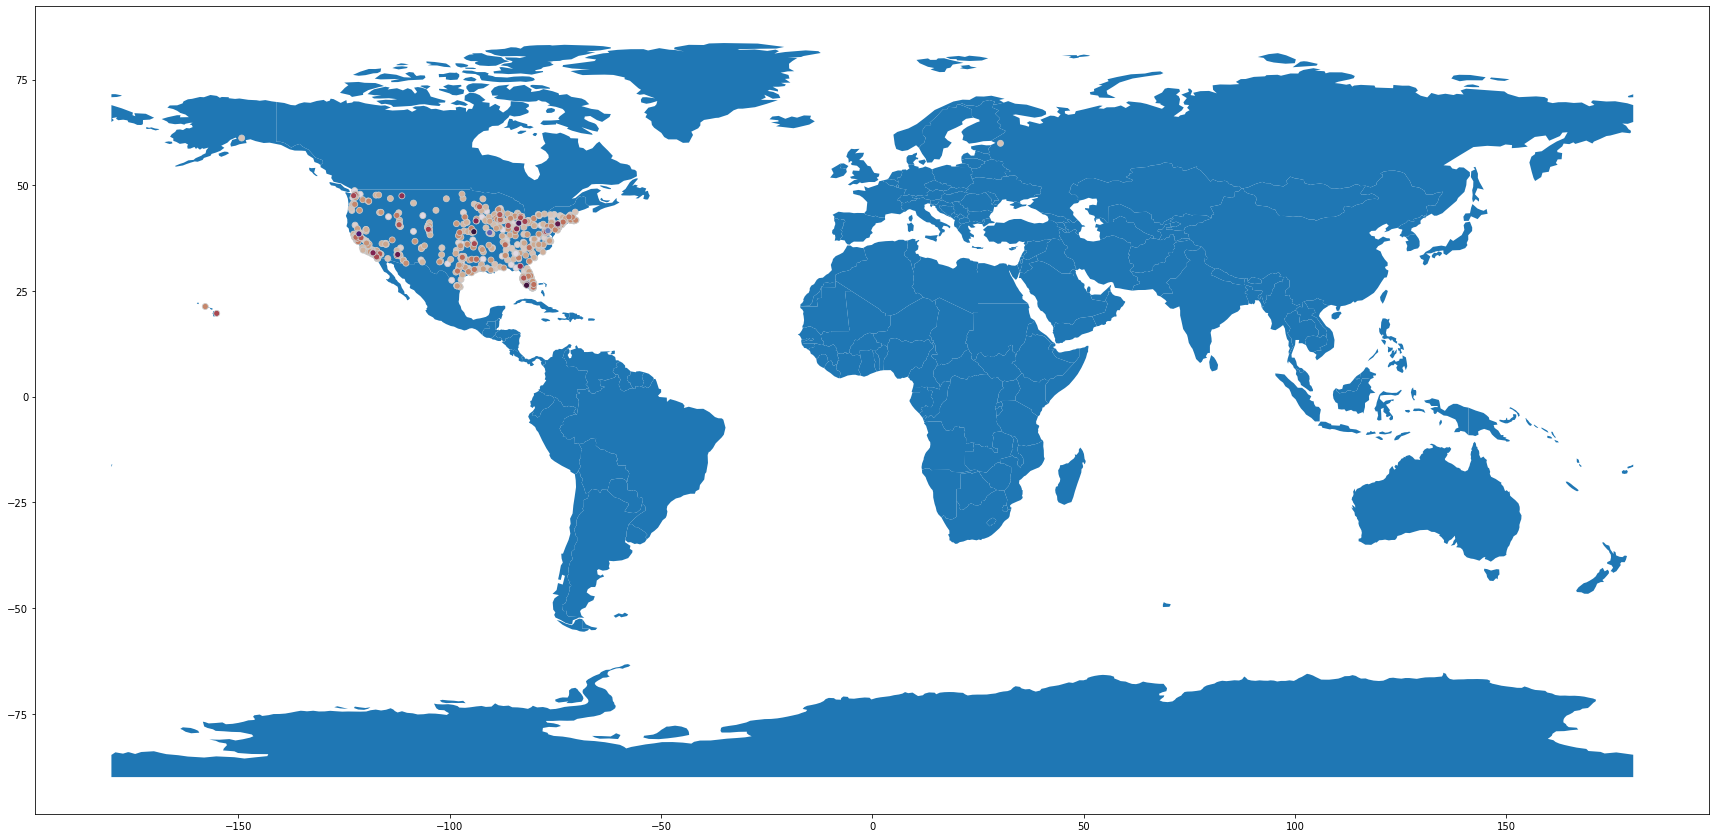

In [92]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world.plot(figsize=(30, 40))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, cmap='twilight_r', column='Conversion',edgecolor='0.8', linewidth=0.8)

plt.show()